# FIFA MINI PROJECT

## 1. Background
We are hired by a new club owner to determine which players they should recruite in order to win the next tournament. For this, we decided on ranking players by their market value. 

We will also be creating a model to predict market values based on a number of variables with the assumption that the higher the market value, the stronger the performance of player is.

## 2. Data Gathering / Import

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# loading dataframe from csv file
df = pd.read_csv('fifa21_male2.csv')
df.head()

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_34365/1086754822.py:2: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fifa21_male2.csv')


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [3]:
# Taking a look at the size of our dataframe
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  17125
Number of columns:  107


## 3. Data Pre-processing (Cleaning, wrangling, ...)

In [4]:
# Checking column names
print(df.columns.tolist()) # list ALL column names

['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP', 'Position', 'Player Photo', 'Club Logo', 'Flag Photo', 'POT', 'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', '

In [5]:
# Create dictionary to replace abbreviations in columns for easier understanding throughout the analysis
new_col_name = {'OVA': 'overall', 
                'BOV': 'best_overall', 
                'BP': 'best_position', 
                'POT': 'potential',
                'FK Accuracy': 'free_kick_acc',
                'W/F': 'weak_foot',
                'SM': 'skill_moves',
                'A/W': 'away_win',
                'D/W': 'duels_won', 
                'IR': 'international_reputation',
                'PAC': 'pace',
                'SHO': 'shooting',
                'PAS': 'passing', 
                'DRI': 'dribbling2',
                'DEF':'defense',
                'PHY':'physical',
                'LS':'left_stick',
                'ST':'striker',
                'RS':'right_stick',
                'LW':'left_wing',
                'LF':'left_forward',
                'CF':'centre_forward',
                'RF':'right_forward',
                'RW':'right_wing',
                'LAM':'left_attacking_midfielder',
                'CAM':'central_attacking_midfielder',
                'RAM':'right_attacking_midfielder',
                'LCM':'left_centre_midfield',
                'CM':'central_midfielder',
                'RCM':'right_centre_midfield',
                'RM':'right_midfielder',
                'LWB': 'left_wing_back',
                'LDM': 'left_defensive_midfielder',
                'CDM': 'center_defensive_midfielder',
                'RDM': 'right_defensive_midfielder',
                'RWB': 'right_wing_back',
                'LB': 'left_back',
                'LCB' : 'left_center_back',
                'CB' : 'center_back',
                'RCB' : 'right_center_back',
                'RB' : 'right_back',
                'GK': 'goalkeeper',
                'LAM': 'left_attacking_midfield',
                'CAM': 'center_attacking_midfielder', 
                'RAM': 'right_attacking_midfielder', 
                'LM': 'linesman'}
new_col_name

{'OVA': 'overall',
 'BOV': 'best_overall',
 'BP': 'best_position',
 'POT': 'potential',
 'FK Accuracy': 'free_kick_acc',
 'W/F': 'weak_foot',
 'SM': 'skill_moves',
 'A/W': 'away_win',
 'D/W': 'duels_won',
 'IR': 'international_reputation',
 'PAC': 'pace',
 'SHO': 'shooting',
 'PAS': 'passing',
 'DRI': 'dribbling2',
 'DEF': 'defense',
 'PHY': 'physical',
 'LS': 'left_stick',
 'ST': 'striker',
 'RS': 'right_stick',
 'LW': 'left_wing',
 'LF': 'left_forward',
 'CF': 'centre_forward',
 'RF': 'right_forward',
 'RW': 'right_wing',
 'LAM': 'left_attacking_midfield',
 'CAM': 'center_attacking_midfielder',
 'RAM': 'right_attacking_midfielder',
 'LCM': 'left_centre_midfield',
 'CM': 'central_midfielder',
 'RCM': 'right_centre_midfield',
 'RM': 'right_midfielder',
 'LWB': 'left_wing_back',
 'LDM': 'left_defensive_midfielder',
 'CDM': 'center_defensive_midfielder',
 'RDM': 'right_defensive_midfielder',
 'RWB': 'right_wing_back',
 'LB': 'left_back',
 'LCB': 'left_center_back',
 'CB': 'center_back',


In [6]:
# Rename columns
df.rename(columns = new_col_name, inplace=True)
df.head()

,ID,Name,Age,overall,Nationality,Club,best_overall,best_position,Position,Player Photo,Club Logo,Flag Photo,potential,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,free_kick_acc,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,weak_foot,skill_moves,away_win,duels_won,international_reputation,pace,shooting,passing,dribbling2,defense,physical,Hits,left_stick,striker,right_stick,left_wing,left_forward,centre_forward,right_forward,right_wing,left_attacking_midfield,center_attacking_midfielder,right_attacking_midfielder,linesman,left_centre_midfield,central_midfielder,right_centre_midfield,right_midfielder,left_wing_back,left_defensive_midfielder,center_defensive_midfielder,right_defensive_midfielder,right_wing_back,left_back,left_center_back,center_back,right_center_back,right_back,goalkeeper,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,36

In [7]:
# Standardize column names (lowercase, replace spaces with underscore)
def standard_cols(dataframe):
    '''Standardize column names into lowercase and replace spaces with underscore.'''
    dataframe.columns = [col.lower().replace(' ','_') for col in df.columns]
standard_cols(df)
df.head()

,id,name,age,overall,nationality,club,best_overall,best_position,position,player_photo,club_logo,flag_photo,potential,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,free_kick_acc,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,weak_foot,skill_moves,away_win,duels_won,international_reputation,pace,shooting,passing,dribbling2,defense,physical,hits,left_stick,striker,right_stick,left_wing,left_forward,centre_forward,right_forward,right_wing,left_attacking_midfield,center_attacking_midfielder,right_attacking_midfielder,linesman,left_centre_midfield,central_midfielder,right_centre_midfield,right_midfielder,left_wing_back,left_defensive_midfielder,center_defensive_midfielder,right_defensive_midfielder,right_wing_back,left_back,left_center_back,center_back,right_center_back,right_back,goalkeeper,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,36

In [8]:
df.gender.unique()

array(['Male'], dtype=object)

In [9]:
# Double check cols
print(df.columns.tolist())

['id', 'name', 'age', 'overall', 'nationality', 'club', 'best_overall', 'best_position', 'position', 'player_photo', 'club_logo', 'flag_photo', 'potential', 'team_&_contract', 'height', 'weight', 'foot', 'growth', 'joined', 'loan_date_end', 'value', 'wage', 'release_clause', 'contract', 'attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'free_kick_acc', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats', 'base_stats', 'weak_foot', 'skill_moves', 'away_win', 'duels_won', 'international_reputation', 'pace', 'shooting', 'passing', 'dribblin

In [10]:
# We noticed 2 dribbling columns and wanted to check if they are the same
df[["dribbling", "dribbling2"]].head(10)

,dribbling,dribbling2
0,73,71
1,69,69
2,79,77
3,68,69
4,85,85
5,67,67
6,77,77
7,77,77
8,44,53
9,75,79


In [11]:
len(df[df.dribbling != df.dribbling2]) # columns are not equal

14347

In [12]:
# Checking df info for nulls, dtypes
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 107 columns):
 #    Column                       Non-Null Count  Dtype  
---   ------                       --------------  -----  
 0    id                           17125 non-null  int64  
 1    name                         17125 non-null  object 
 2    age                          17125 non-null  int64  
 3    overall                      17125 non-null  int64  
 4    nationality                  17125 non-null  object 
 5    club                         17102 non-null  object 
 6    best_overall                 17125 non-null  int64  
 7    best_position                17125 non-null  object 
 8    position                     16712 non-null  object 
 9    player_photo                 17125 non-null  object 
 10   club_logo                    17102 non-null  object 
 11   flag_photo                   17125 non-null  object 
 12   potential                    17125 non-null  int64  
 13  

Anomalies detected above:
1. Following date columns are considered objects instead of numbers:
    - height
    - weight
    - value
    - wage
    - release clause

    <br/>
2. Following date columns are considered objects intead of datetime
    - joined
    - loan_date_end
    - contract (year, duration)
    
    <br/>
3. Ratings are considered objects because values have a star symbol in the cell:
    - weak foot
    - skill moves
    - international rating
    
    <br/>
4. Following columns will be dropped:
    - columns 79 to 105 which consist of values with + sign. These columns are stats of each player for each position.
    - all images columns: player_photo, club_logo, flag_photo
    - gender: all are male

In [13]:
# new df with columns 79 to 106 dropped
df0 = df.iloc[:, :79]
df0.head()

,id,name,age,overall,nationality,club,best_overall,best_position,position,player_photo,club_logo,flag_photo,potential,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,free_kick_acc,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,weak_foot,skill_moves,away_win,duels_won,international_reputation,pace,shooting,passing,dribbling2,defense,physical,hits
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149


In [14]:
image = ['player_photo', 'club_logo', 'flag_photo']
df0.drop(columns= image, axis=1, inplace=True)
df0.head()

,id,name,age,overall,nationality,club,best_overall,best_position,position,potential,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,free_kick_acc,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,weak_foot,skill_moves,away_win,duels_won,international_reputation,pace,shooting,passing,dribbling2,defense,physical,hits
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149


In [15]:
df.isna().sum()

id                                 0
name                               0
age                                0
overall                            0
nationality                        0
club                              23
best_overall                       0
best_position                      0
position                         413
player_photo                       0
club_logo                         23
flag_photo                         0
potential                          0
team_&_contract                    0
height                             0
weight                             0
foot                               0
growth                             0
joined                            58
loan_date_end                  16215
value                              0
wage                               0
release_clause                     0
contract                           0
attacking                          0
crossing                           0
finishing                          0
h

### Creating subsets


We are creating 3 subsets from the full data set:

#### df1 = **EA Sports FIFA 19 Game**
- Player id
- Player Name
- Club of the Player
- Best Position
- Best Overall
- Position
- Overall
- Pace
- Shooting
- Passing
- Dribbling
- Defending
- Physical
- Hits
 'id',name','club', 'best_position', 'best_overall',
 'position', 'overall', 'pace',
 'shooting',
 'passing',
 'dribbling2',
 'defense',
 'physical', 'hits',

#### df2 = Transfermarkt and extra info by player
- Player id
- Age
- Nationality
- Height
- Foot
- Day Joined the current club
- Day of Contract End
- Market Value of the Player
 'age', 'nationality',  'team_&_contract', 'height',
 'weight', 'foot', 'weak_foot', 'skill_moves', 'joined',
 'loan_date_end', 'value', 'wage', 'release_clause',
 'contract',  'potential','away_win',
 'duels_won',
'international_reputation', 

#### df3 = Player Stats
1. **ATTACKING**
- Crossing
- Finishing
- Heading Accuracy
- Short Passing
- Volleys

2. **SKILL**
- Dribbling
- Curve
- FK Accuracy
- Long Passing
- Ball Control

3. **MOVEMENT**

- Acceleration
- Sprint Speed
- Agility
- Reactions
- Balance

4. **POWER**
- Shot Power
- Jumping
- Stamina
- Strength
- Long Shots

5. **MENTALITY**
- Aggression
- Interceptions
- Positioning
- Vision
- Penalties
- Composure

6. **DEFENDING**
- Defensive Awareness
- Standing Tackle
- Sliding Tackle

7. **GOALKEEPING**
- GK Diving
- GK Handling
- GK Kicking
- GK Positioning
- GK Reflexes

8. Growth
9. Base Stats
10. Total Stats

In [16]:
# list of columns for df3
cols_df3 = ['id', 'growth', 'base_stats', 'total_stats',
            'attacking', 'crossing', 'finishing', 'heading_accuracy','short_passing', 'volleys',
            'skill', 'dribbling', 'curve', 'free_kick_acc', 'long_passing', 'ball_control',
            'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
            'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
            'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure',
            'defending', 'marking', 'standing_tackle', 'sliding_tackle',
            'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']

In [17]:
df3 = df[cols_df3]
df3.head()

,id,growth,base_stats,total_stats,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,free_kick_acc,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2,0,408,1929,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12
1,16,0,385,1906,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11
2,27,0,354,1770,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7
3,36,14,369,1348,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21
4,41,0,420,2014,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7


In [18]:
len(df3)

17125

In [19]:
df3.duplicated().sum()

0

In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                17125 non-null  int64  
 1   growth            17125 non-null  int64  
 2   base_stats        17125 non-null  int64  
 3   total_stats       17125 non-null  int64  
 4   attacking         17125 non-null  int64  
 5   crossing          17125 non-null  int64  
 6   finishing         17125 non-null  int64  
 7   heading_accuracy  17125 non-null  int64  
 8   short_passing     17125 non-null  int64  
 9   volleys           17067 non-null  float64
 10  skill             17125 non-null  int64  
 11  dribbling         17125 non-null  int64  
 12  curve             17067 non-null  float64
 13  free_kick_acc     17125 non-null  int64  
 14  long_passing      17125 non-null  int64  
 15  ball_control      17125 non-null  int64  
 16  movement          17125 non-null  int64 

In [30]:
df3.growth.unique()

array([ 0, 14,  4,  6,  3, 21, 17,  8, 12,  7,  2, 11,  5, 13,  9, 18, 10,
        1, -1, 16, 20, 19, 15, 23, 22, 25, 24, 26])

In [22]:
df3.isna().sum()

id                    0
growth                0
base_stats            0
total_stats           0
attacking             0
crossing              0
finishing             0
heading_accuracy      0
short_passing         0
volleys              58
skill                 0
dribbling             0
curve                58
free_kick_acc         0
long_passing          0
ball_control          0
movement              0
acceleration          0
sprint_speed          0
agility              58
reactions             0
balance              58
power                 0
shot_power            0
jumping              58
stamina               0
strength              0
long_shots            0
mentality             0
aggression            0
interceptions         7
positioning           7
vision               58
penalties             0
composure           423
defending             0
marking               0
standing_tackle       0
sliding_tackle       58
goalkeeping           0
gk_diving             0
gk_handling     

In [23]:
df3_null= df3[df3.isna().any(axis=1)]
df3_null

,id,growth,base_stats,total_stats,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,free_kick_acc,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2,0,408,1929,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12
2,27,0,354,1770,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7
3,36,14,369,1348,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21
5,61,4,360,1649,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,71,70.0,64,61,49,256,63,26.0,63.0,58.0,46,NaN,79,22,26,31.0,46,8,13,7,9,9
7,241,0,392,1939,380,90,70,60,85,75.0,402,77,87.0,78,81,79,337,59,60,72.0,76,70.0,310,71,59.0,48,61,71,358,60,47.0,78.0,83.0,90,NaN,120,26,43,51.0,32,10,5,7,5,5
8,244,6,378,1774,304,72,31,75,71,55.0,258,44,56.0,33,61,64,324,64,70,51.0,72,67.0,284,47,70.0,65,74,28,319,87,85.0,45.0,70.0,32,NaN,242,78,81,83.0,43,12,9,5,6,11
9,246,0,415,2065,394,83,65,72,89,85.0,393,75,74.0,67,90,87,338,53,53,68.0,82,82.0,333,88,64.0,34,63,84,417,87,79.0,83.0,91.0,77,NaN,143,58,49,36.0,47,7,12,5,15,8
10,249,0,381,1868,315,73,36,69,74,63.0,283,53,45.0,41,72,72,321,52,51,65.0,83,70.0,349,77,71.0,61,76,64,335,78,83.0,48.0,57.0,69,NaN,224,77,75,72.0,41,10,7,12,5,7
11,250,0,411,2012,335,82,62,41,82,68.0,419,66,94.0,89,87,83,318,54,62,58.0,80,64.0,372,79,59.0,81,70,83,367,81,57.0,72.0,87.0,70,NaN,150,60,46,44.0,51,10,12,7,15,7
13,388,4,347,1581,206,20,28,81,54,23.0,173,40,19.0,15,44,55,321,61,68,44.0,68,80.0,319,57,85.0,64,87,26,296,84,77.0,41.0,57.0,37,NaN,222,72,77,73.0,44,11,7,12,5,9


In [24]:
# create a function to check if sum of subcategories are equal to the values found in the main stat categories
main_category = ['attacking', 'skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping']
main_cat = df3[main_category]
# subcategories
attack = df3[['crossing', 'finishing', 'heading_accuracy','short_passing', 'volleys']]
skill = df3[['dribbling', 'curve', 'free_kick_acc', 'long_passing', 'ball_control']]
movement = df3[['acceleration', 'sprint_speed', 'agility', 'reactions', 'balance']]
power = df3[['shot_power', 'jumping', 'stamina', 'strength', 'long_shots']]
mentality = df3[['aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure']]
defense = df3[['marking', 'standing_tackle', 'sliding_tackle']]
goal= df3[['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']]
# list of all new subcategory df
subcategory = [attack, skill, movement, power, mentality, defense, goal]

In [25]:
def check_equality(main, i, sub_sum):
    '''This function can be used to check if the sum of the values in the stats subcategories are equal to the value
    in the main category column.
    main = the column pertaining to a main category being compared
    i = index position
    sub_sum = the sum of all columns considered a subcategory of the main
    result = count of True (values are equal) and False (values are not equal)'''
    main = main.iloc[:, i]
    sub_sum = sub_sum[i].sum(axis=1)
    result = (main == sub_sum).value_counts()  
    return result

In [26]:
check_equality(main_cat, 6, subcategory)

True     17067
False       58
dtype: int64

In [27]:
# append to list
sum_check = []
for i in range(7):
        sum_check.append(check_equality(main_cat,i, subcategory))

In [28]:
df_check = pd.DataFrame(sum_check).T
df_check.columns = main_cat.columns
df_check.fillna(0,inplace=True)
df_check

,attacking,skill,movement,power,mentality,defending,goalkeeping
True,17125.0,17125.0,17125.0,17125.0,423.0,17125.0,17067.0
False,0.0,0.0,0.0,0.0,16702.0,0.0,58.0


We can see the main category columns are the sum of the stats

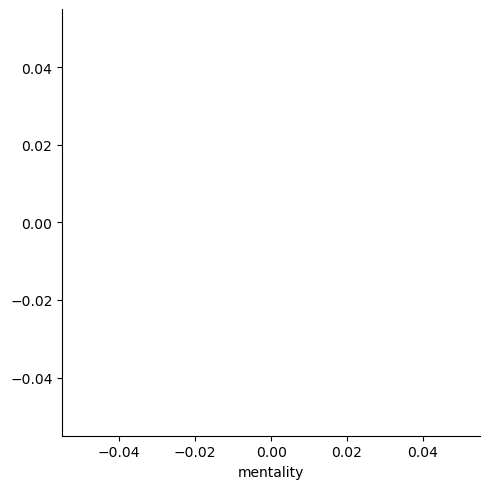

In [31]:
sns.relplot(kind='scatter', x=main_cat['mentality'], )

In [ ]:
sns.scatterplot(x= df.total_stats, y= main_cat.sum(axis=1))

In [ ]:
(df.total_stats == main_cat.sum(axis=1)).value_counts()

In [32]:
sns.barplot(data=df_check, x= dy = df_check.mentality)

SyntaxError: invalid syntax (2422306847.py, line 1)

In [ ]:
sns.relplot(data= df3, x = )

In [ ]:
a = check_equality(main_category, subcategory)
a

In [ ]:
check_sum

In [ ]:
check_equality(main_category, i, subcategory)

In [ ]:
a

In [ ]:
num = df.select_dtypes(np.number)
num.head()

In [ ]:
cat = df.select_dtypes(object)
cat.head()